In [12]:
# Import Dependencies

import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [13]:
# Import csv into DataFrame

tdot_df_raw = pd.read_csv("../Resources/Major_Crime_Indicators.csv")

tdot_df_raw

,X,Y,Index_,event_unique_id,Division,occurrencedate,reporteddate,location_type,premises_type,ucr_code,...,occurrencedayofyear,occurrencedayofweek,occurrencehour,cleared,mci_category,Hood_ID,Neighbourhood,Longitude,Latitude,ObjectId
0,-8.850398e+06,5.429359e+06,201,GO-20141273318,D31,2014/01/03 05:00:00+00,2014/01/03 05:00:00+00,"Apartment (Rooming House, Condo)",Apartment,1430,...,3.0,Friday,11,NO,Assault,27,York University Heights,-79.504475,43.766371,1
1,-8.818405e+06,5.436836e+06,202,GO-20141274349,D42,2014/01/03 05:00:00+00,2014/01/03 05:00:00+00,"Single Home, House (Attach Garage, Cottage, Mo...",House,2120,...,3.0,Friday,14,NO,Break and Enter,132,Malvern,-79.217083,43.814861,2
2,-8.853791e+06,5.402071e+06,203,GO-20141274052,D22,2014/01/03 05:00:00+00,2014/01/03 05:00:00+00,"Open Areas (Lakes, Parks, Rivers)",Outside,1430,...,3.0,Friday,13,NO,Assault,19,Long Branch,-79.534957,43.589085,3
3,-8.832822e+06,5.419628e+06,204,GO-20141276966,D53,2014/01/03 05:00:00+00,2014/01/03 05:00:00+00,Other Commercial / Corporate Places (For Profi...,Commercial,2130,...,3.0,Friday,12,YES,Theft Over,55,Thorncliffe Park,-79.346588,43.703212,4
4,-8.853452e+06,5.410706e+06,205,GO-20141274457,D22,2014/01/03 05:00:00+00,2014/01/03 05:00:00+00,Convenience Stores,Commercial,1610,...,3.0,Friday,14,NO,Robbery,14,Islington-City Centre West,-79.531916,43.645247,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301228,-8.844901e+06,5.433057e+06,301113,GO-20221234233,D32,2022/06/28 04:00:00+00,2022/06/29 04:00:00+00,"Single Home, House (Attach Garage, Cottage, Mo...",House,2135,...,179.0,Tuesday,20,NO,Auto Theft,35,Westminster-Branson,-79.455098,43.790363,301229
301229,-8.820395e+06,5.430803e+06,301114,GO-20221234061,D43,2022/06/28 04:00:00+00,2022/06/29 04:00:00+00,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,2135,...,179.0,Tuesday,21,NO,Auto Theft,137,Woburn,-79.234954,43.775740,301230
301230,-8.825525e+06,5.429271e+06,301115,GO-20221234664,D41,2022/05/20 04:00:00+00,2022/06/29 04:00:00+00,Other Commercial / Corporate Places (For Profi...,Commercial,2135,...,140.0,Friday,12,YES,Auto Theft,126,Dorset Park,-79.281037,43.765801,301231
301231,0.000000e+00,0.000000e+00,301116,GO-20221235156,D41,2022/06/29 04:00:00+00,2022/06/29 04:00:00+00,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,2135,...,180.0,Wednesday,0,NO,Auto Theft,NSA,NSA,0.000000,0.000000,301232


In [14]:
# Clean Data

# Remove unneccessary columns

tdot_df = tdot_df_raw[['premises_type','occurrenceyear', 'occurrencemonth','occurrencedayofweek','occurrencehour',
       'mci_category', 'Hood_ID', 'Neighbourhood', 'Longitude',
       'Latitude','ObjectId']]

tdot_df

,premises_type,occurrenceyear,occurrencemonth,occurrencedayofweek,occurrencehour,mci_category,Hood_ID,Neighbourhood,Longitude,Latitude,ObjectId
0,Apartment,2014.0,January,Friday,11,Assault,27,York University Heights,-79.504475,43.766371,1
1,House,2014.0,January,Friday,14,Break and Enter,132,Malvern,-79.217083,43.814861,2
2,Outside,2014.0,January,Friday,13,Assault,19,Long Branch,-79.534957,43.589085,3
3,Commercial,2014.0,January,Friday,12,Theft Over,55,Thorncliffe Park,-79.346588,43.703212,4
4,Commercial,2014.0,January,Friday,14,Robbery,14,Islington-City Centre West,-79.531916,43.645247,5
...,...,...,...,...,...,...,...,...,...,...,...
301228,House,2022.0,June,Tuesday,20,Auto Theft,35,Westminster-Branson,-79.455098,43.790363,301229
301229,Outside,2022.0,June,Tuesday,21,Auto Theft,137,Woburn,-79.234954,43.775740,301230
301230,Commercial,2022.0,May,Friday,12,Auto Theft,126,Dorset Park,-79.281037,43.765801,301231
301231,Outside,2022.0,June,Wednesday,0,Auto Theft,NSA,NSA,0.000000,0.000000,301232


In [15]:
# Convert NSA values to NaN

tdot_df_drp = tdot_df.replace("NSA",np.nan)

# Remove rows with incomplete data

tdot_df_drp = tdot_df_drp.dropna().reset_index(drop=True)

print(f"The total number of rows dropped is: {len(tdot_df.index)-len(tdot_df_drp.index)}")

tdot_df_drp

The total number of rows dropped is: 5027


,premises_type,occurrenceyear,occurrencemonth,occurrencedayofweek,occurrencehour,mci_category,Hood_ID,Neighbourhood,Longitude,Latitude,ObjectId
0,Apartment,2014.0,January,Friday,11,Assault,27,York University Heights,-79.504475,43.766371,1
1,House,2014.0,January,Friday,14,Break and Enter,132,Malvern,-79.217083,43.814861,2
2,Outside,2014.0,January,Friday,13,Assault,19,Long Branch,-79.534957,43.589085,3
3,Commercial,2014.0,January,Friday,12,Theft Over,55,Thorncliffe Park,-79.346588,43.703212,4
4,Commercial,2014.0,January,Friday,14,Robbery,14,Islington-City Centre West,-79.531916,43.645247,5
...,...,...,...,...,...,...,...,...,...,...,...
296201,House,2022.0,June,Tuesday,23,Auto Theft,60,Woodbine-Lumsden,-79.308515,43.695118,301228
296202,House,2022.0,June,Tuesday,20,Auto Theft,35,Westminster-Branson,-79.455098,43.790363,301229
296203,Outside,2022.0,June,Tuesday,21,Auto Theft,137,Woburn,-79.234954,43.775740,301230
296204,Commercial,2022.0,May,Friday,12,Auto Theft,126,Dorset Park,-79.281037,43.765801,301231


In [16]:
# Groupby premise_type. Numbers show all reported incidents of crime per type. 

premise_type = tdot_df_drp.groupby(by='premises_type').count()['ObjectId']
premise_type

premises_type
Apartment      71207
Commercial     59936
Educational     7678
House          53331
Other          17563
Outside        78099
Transit         8392
Name: ObjectId, dtype: int64

In [18]:
# sum of incidents to find out 'expected'

premise_sum = sum(tdot_df_drp.groupby(by='premises_type').count()['ObjectId'])
premise_sum

296206

In [19]:
# create df ["observed", "expected"]; expected is sum total / n of types, which is a calculation based on the 
# assumption that all buildings regardless of premise type are equally prone to crime. 

premise_df = premise_type.to_frame()
premise_df[1] = premise_sum/len(premise_type.index)
premise_df.columns = ["observed", "expected"]
premise_df

,observed,expected
premises_type,,
Apartment,71207,42315.142857
Commercial,59936,42315.142857
Educational,7678,42315.142857
House,53331,42315.142857
Other,17563,42315.142857
Outside,78099,42315.142857
Transit,8392,42315.142857


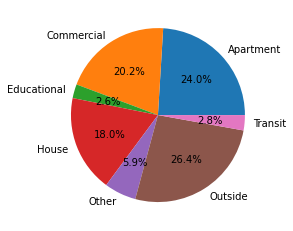

In [24]:
plt.pie(premise_df['observed'], labels=['Apartment', 'Commercial', 'Educational', 'House', 
                                'Other', 'Outside', 'Transit'], autopct='%1.1f%%')
plt.savefig("crime_vs_premise_type.jpg")
plt.show()
